In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
for col in df.columns: print(col,df[col].unique(),df[col].nunique())

ph [       nan 3.71608008 8.09912419 ... 9.41951032 5.12676292 7.87467136] 2785
Hardness [204.89045547 129.42292051 224.23625939 ... 175.7626463  230.60375751
 195.10229859] 3276
Solids [20791.31898075 18630.05785797 19909.54173229 ... 33155.57821831
 11983.86937634 17404.17706105] 3276
Chloramines [7.30021187 6.63524588 9.2758836  ... 7.35023323 6.30335653 7.50930586] 3276
Sulfate [368.51644135          nan 356.88613564 ... 258.93060041 345.70025734
 359.94857437] 2495
Conductivity [564.30865417 592.88535913 418.60621306 ... 432.04478305 402.88311312
 327.45976046] 3276
Organic_carbon [10.37978308 15.18001312 16.86863693 ... 11.03906969 11.16894622
 16.14036763] 3276
Trihalomethanes [86.99097046 56.32907628 66.42009251 ... 69.84540029 77.4882131
 78.69844633] 3114
Turbidity [2.96313538 4.50065627 3.05593375 ... 3.2988755  4.70865847 2.30914906] 3276
Potability [0 1] 2


In [7]:
print(df.isnull().sum())
df.duplicated().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


np.int64(0)

In [8]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
df[['ph','Sulfate','Trihalomethanes']] = imputer.fit_transform(df[['ph','Sulfate','Trihalomethanes']])

In [9]:
len(df['Potability'])

3276

In [10]:
df['Potability'].groupby(df['Potability']).count()*100/len(df['Potability'])

Potability
0    60.989011
1    39.010989
Name: Potability, dtype: float64

In [11]:
X=df.iloc[:,:-1]
y=df['Potability']

In [ ]:

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

<Axes: >

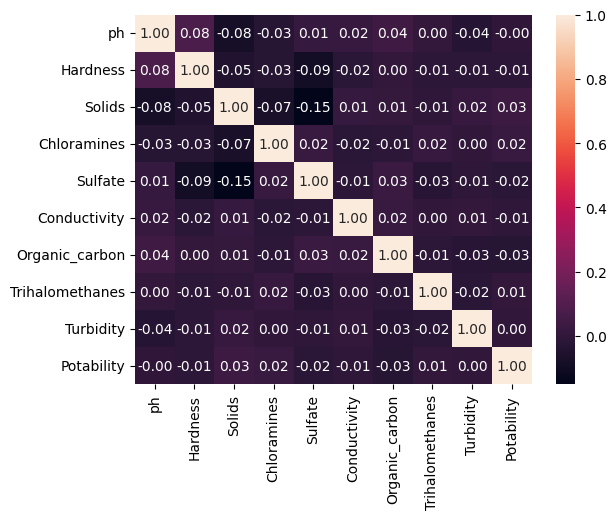

In [13]:
corr=df.corr()
sns.heatmap(corr,annot=True,fmt=".2f")

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,recall_score,f1_score,roc_auc_score,classification_report,precision_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [15]:
models={
    "SVM classifier":SVC(probability=True),
    "KNN classifier":KNeighborsClassifier(),
    "GaussianNB":GaussianNB(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "XG boost":XGBClassifier(use_label_encoder=False,eval_metric="logloss"),
    "Ada Boost":AdaBoostClassifier(),
    "Gradient Boosting":GradientBoostingClassifier()
}

In [ ]:

param_grids = {
    "Random Forest": {
        "n_estimators": [100, 200],
        "max_depth": [1, 5, 10]
    },
    "SVM": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"]
    },
    "KNN": {
        "n_neighbors": [3, 5, 7, 9]
    },
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10],
        "penalty": ["l2"]
    }
}

In [ ]:
results = []
import pickle
best_model = None
best_recall = 0
best_name = ""
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    if name in param_grids:  
        search = RandomizedSearchCV(model, param_grids[name], cv=5, scoring="accuracy", n_jobs=-1)
        search.fit(X_train, y_train)
        best_model = search.best_estimator_
        print("Best Params:", search.best_params_)
    else:
        best_model = model
        best_model.fit(X_train, y_train)
    
    y_pred = best_model.predict(X_test)


    if hasattr(best_model, "predict_proba"):
        y_proba = best_model.predict_proba(X_test)[:, 1]
        y_pred = (y_proba >= 0.3).astype(int)  
    else:
        y_proba = best_model.decision_function(X_test)

    recall=recall_score(y_test,y_pred)
    acc = f1_score(y_test,y_pred)
    roc = roc_auc_score(y_test, y_proba)
    if recall > best_recall:
        best_recall = recall
        best_model = model
        best_name = name

    print("recall_score:", recall)
    print("ROC-AUC:", roc)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

   
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

   
    results.append([name, acc, roc])

In [ ]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba) if y_proba is not None else None
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\n📊 Model Comparison Table:\n")
print(results_df)

# Find the best model based on Recall
best_model_name = results_df.loc[results_df["Recall"].idxmax(), "Model"]
print(f"\n✅ Best model based on Recall Score: {best_model_name}")

In [ ]:

with open("model.pkl", "wb") as f:
    pickle.dump((best_model), f)